<a href="https://colab.research.google.com/github/johnadornado/Computer-Vision-Crash-Course-/blob/main/Activity_5_Line_and_Circle_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | CPE 313-CPE32S3 - Advanced Machine Learning and Deep Learning
2nd Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO. 5** | **Line and Circle Detection**
**Name** | Adornado, John louie
**Section** | CPE32s3
**Date Performed**: |
**Date Submitted**: |
**Instructor**: | Dr. Jonathan V. Taylar / Engr. Verlyn V. Nojor / Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

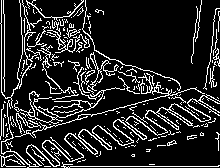

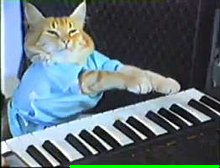

In [1]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/Keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?
2. What is the mathematical formula for Hough transform and explain how it finds lines.

### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

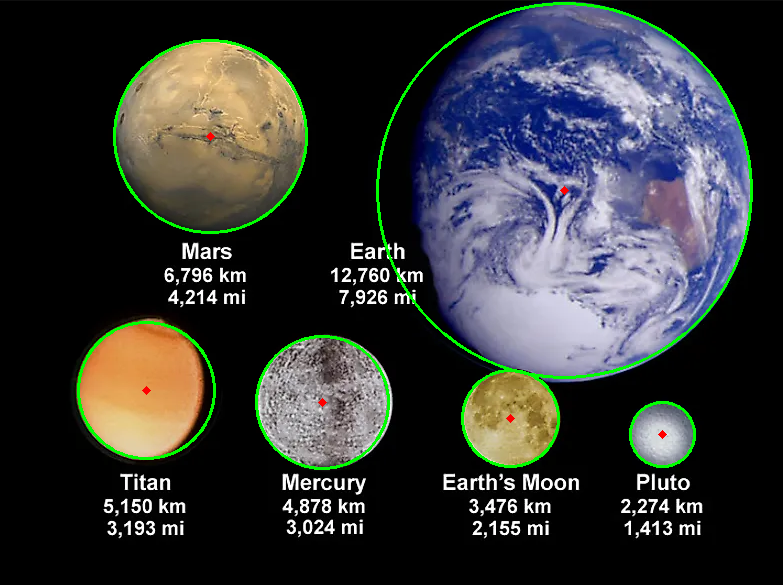

In [28]:
import cv2
import numpy as np

# Our testing value
n = 25

planets = cv2.imread('/content/planets.png')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

What happens to the code once you run **and the value of n is 5**?

 **there is random circles because the planets cannot be detected due to having a low value of n**

Change the value to 9, **what happens to the image**?


The circles are still random but some of the planets are encircled now need to increase the value more

Lastly, change the value to 15, **what can you say about the resulting image?**

The circles are less random. The planets now have more circles, but the smaller planets still aren’t being circled.

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

by providing or adjusting the value of n we can change the params and it will help to see more of the planets when i changed it to 20 all the planets were able to be seen by the circle detection.

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

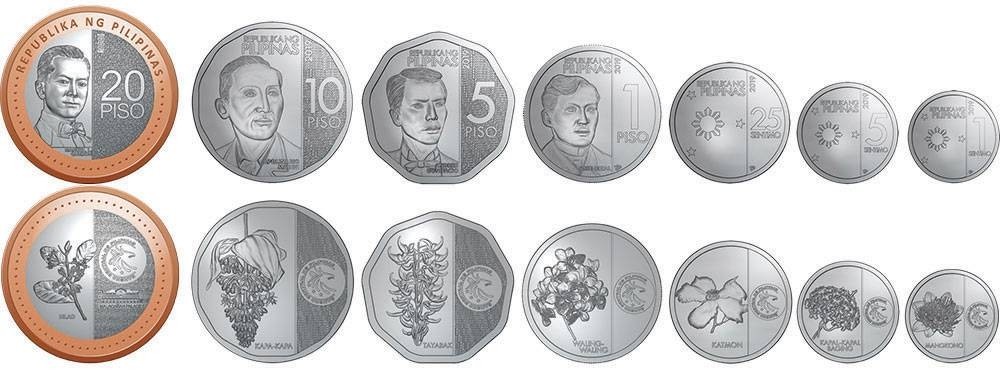

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

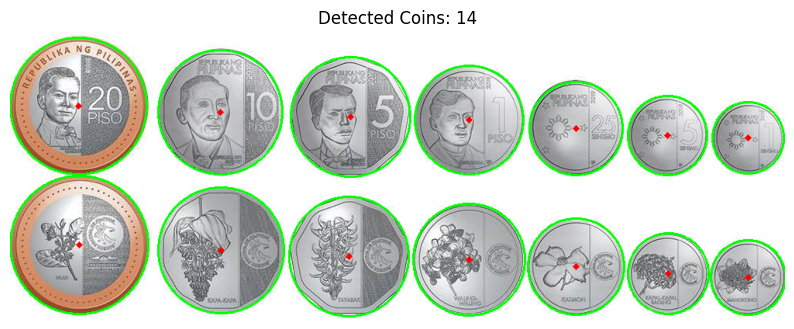

In [76]:
image_path =('/content/coins.jpg')
import matplotlib.pyplot as plt

def detect_circles(image_path):
    """Detect and count circles using Hough Circle Transform."""
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50, param1=100, param2=30,
                               minRadius=20,
                               maxRadius=100
    )

    # Draw detected circles
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)  # Draw outer circle
            cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)  # Draw center

    # Display the result
    num_coins = len(circles[0]) if circles is not None else 0
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Detected Coins: {num_coins}")
    plt.axis("off")
    plt.show()

    return num_coins
circle_count = detect_circles(image_path)

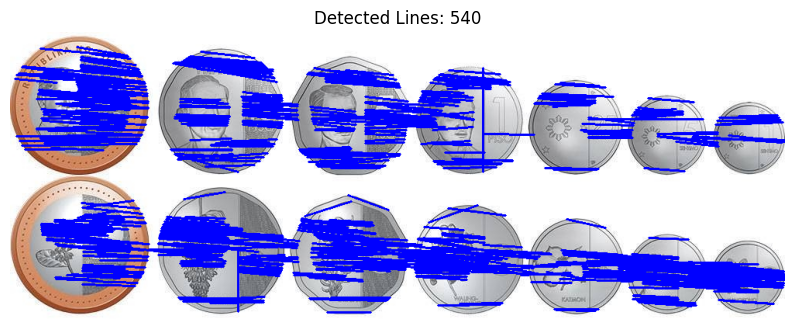

In [80]:
image_path =('/content/coins.jpg')

def lines_for_coins(image_path):
    """
    draw lines using Hough Line Transform.
    """
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Detected Lines: {len(lines) if lines is not None else 0}")
    plt.axis("off")
    plt.show()
line_count = lines_for_coins(image_path)
line_count

## 5. Summary, Conclusions and Lessons Learned

**Summary**

 We explored the Hough Transform and its application to line and circle detection in images using OpenCV's APIs. It discusses line detection using HoughLinesP, usage and parameters and with Canny edge detection. Under circle detection, it discusses the HoughCircles function via an example discussing the effect of variation of median blur values (n) on detection accuracy. A different exercise applies HoughCircles on an image of Philippine coins and experiments with the effect of parameters on detecting round shapes.

**Conclusions**

The Hough Transform is an effective line and circle detection method.

Preprocessing steps like blurring and edge detection significantly enhance detection accuracy. Parameters like the minimum line length, maximum gap value between lines, and other are significant to get the correct results. Choosing median blur parameter (`n`) for circle detection is a very significant role it plays in circumscribing planet like circle image. Parameter adjustment by setting configuration under experimental test provokes for Hough Transform operation as a prerequisite for optimal detection output.

**Lessons Learned**

We have been provided with practice with the OpenCV operations of Hough Transform, HoughLinesP for line detection and HoughCircles for circle detection.

We explored and demonstrates the contribution of the image preprocessing operations like blurring and edge detection towards smoothening the detection process.
Parameter tuning needs to be known since they have real-time implications on the detection outcome.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*